In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn import datasets, metrics, model_selection



from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
...





from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, AveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import cv2
from PIL import Image
import tensorflow as tf

# read data

In [13]:
xlsx = pd.ExcelFile('./data.xlsx')
df = pd.read_excel(xlsx, 'training data')
dataset1= df.copy()
dataset1

,Voltage,SD,Y
0,1.114175,0.2315,bubble
1,1.169525,0.9970,bubble
2,1.061900,0.3505,bubble
3,1.060875,0.3820,bubble
4,1.121350,0.2205,bubble
...,...,...,...
140,10.010150,1.5670,annular
141,9.958900,1.7680,annular
142,9.922000,1.7670,annular
143,9.909700,1.6560,annular


# standadise data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset1)
data1_Sd= Sd_scaler1.transform(dataset1)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset1.keys())

# split ddata 

In [3]:
inputs = dataset1.copy()

target = inputs.pop('Y')



Y=target
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
target_dm = np_utils.to_categorical(encoded_Y)


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target_dm, train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))


train samples: 101
test samples 44


# encode label


Y1=train_target
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
train_target_dm = np_utils.to_categorical(encoded_Y)

Y2=test_target
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y2)
encoded_Y2 = encoder.transform(Y2)
# convert integers to dummy variables (i.e. one hot encoded)
test_target = np_utils.to_categorical(encoded_Y2)


# Model

In [ ]:
 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 

In [ ]:
#  Evaluate The Model with k-Fold Cross Validation

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, train_input, train_target_dm , cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(Dense(64,activation="relu"
#                           , input_shape=(dataset.shape[1]-1,),
                        , input_shape=(dataset_pca.shape[1],),
                          kernel_regularizer="l2"
                         ))
model.add(Dropout(0.2))


model.add(Dense(units = 1, activation= 'softmax'))
              

from keras.optimizers import Adam
#opt = Adam(lr=0.001)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()
    


# Train

In [7]:
 # create model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(4, activation='softmax'))
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("ANN_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

history=model.fit(train_input,train_target,batch_size =40,epochs=70,verbose=1,
                  validation_data=(test_input, test_target),
#                   callbacks=[checkpoint,early],
                  shuffle=True)
history

Epoch 1/70
3/3 [==============================] - 0s 109ms/step - loss: 1.3720 - accuracy: 0.5248 - val_loss: 2.1194 - val_accuracy: 0.4091
Epoch 2/70
3/3 [==============================] - 0s 11ms/step - loss: 1.3519 - accuracy: 0.5248 - val_loss: 2.0884 - val_accuracy: 0.4091
Epoch 3/70
3/3 [==============================] - 0s 28ms/step - loss: 1.3305 - accuracy: 0.5248 - val_loss: 2.0590 - val_accuracy: 0.4091
Epoch 4/70
3/3 [==============================] - 0s 27ms/step - loss: 1.3108 - accuracy: 0.5248 - val_loss: 2.0298 - val_accuracy: 0.4091
Epoch 5/70
3/3 [==============================] - 0s 28ms/step - loss: 1.2914 - accuracy: 0.5248 - val_loss: 1.9998 - val_accuracy: 0.4091
Epoch 6/70
3/3 [==============================] - 0s 17ms/step - loss: 1.2719 - accuracy: 0.5248 - val_loss: 1.9695 - val_accuracy: 0.4091
Epoch 7/70
3/3 [==============================] - 0s 11ms/step - loss: 1.2520 - accuracy: 0.5248 - val_loss: 1.9401 - val_accuracy: 0.4091
Epoch 8/70
3/3 [==========

Epoch 59/70
3/3 [==============================] - 0s 15ms/step - loss: 0.6696 - accuracy: 0.6832 - val_loss: 0.9174 - val_accuracy: 0.5000
Epoch 60/70
3/3 [==============================] - 0s 15ms/step - loss: 0.6643 - accuracy: 0.6832 - val_loss: 0.9092 - val_accuracy: 0.5000
Epoch 61/70
3/3 [==============================] - 0s 20ms/step - loss: 0.6595 - accuracy: 0.6832 - val_loss: 0.9014 - val_accuracy: 0.5000
Epoch 62/70
3/3 [==============================] - 0s 21ms/step - loss: 0.6545 - accuracy: 0.6832 - val_loss: 0.8949 - val_accuracy: 0.5000
Epoch 63/70
3/3 [==============================] - 0s 23ms/step - loss: 0.6500 - accuracy: 0.6832 - val_loss: 0.8865 - val_accuracy: 0.5000
Epoch 64/70
3/3 [==============================] - 0s 24ms/step - loss: 0.6454 - accuracy: 0.6832 - val_loss: 0.8788 - val_accuracy: 0.5000
Epoch 65/70
3/3 [==============================] - 0s 13ms/step - loss: 0.6411 - accuracy: 0.6832 - val_loss: 0.8710 - val_accuracy: 0.5000
Epoch 66/70
3/3 [===


model.fit(
    train_input, train_target,
    validation_split=0.3,
    verbose=0,
    batch_size = 2,
    

    #early stopping
    callbacks= keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
    
    
)

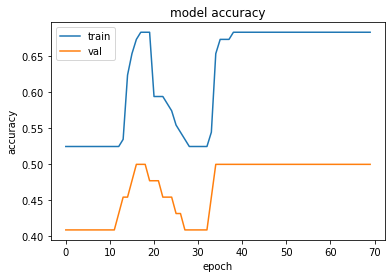

In [8]:
# ANN mdel accuracy & loss visualtion on Train & Validation dataset

import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

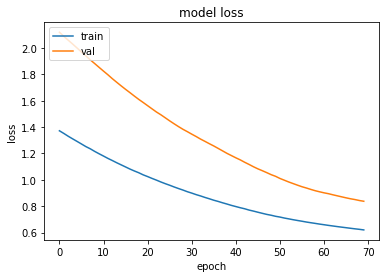

In [9]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluate the Model
* Learning curves (Loss)(skip)
* Learning curves (Accuracy)
* Confusion matrix

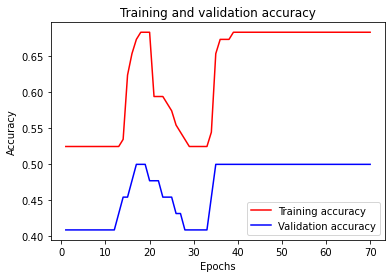

In [10]:

history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(test_input) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(test_target.argmax(axis=1), preds.argmax(axis=1))
matrix
## array([[50,  0,  0],
##        [ 0, 46,  4],
##        [ 0,  1, 49]])


# more detail on how well things were predicted
print(classification_report(test_target.argmax(axis=1), preds.argmax(axis=1)))
##               precision    recall  f1-score   support
## 
##            0       1.00      1.00      1.00        50
##            1       0.98      0.92      0.95        50
##            2       0.92      0.98      0.95        50
## 
##     accuracy                           0.97       150
##    macro avg       0.97      0.97      0.97       150
## weighted avg       0.97      0.97      0.97       150


[0.0847784  0.08141418 0.26247248 0.57133496]
1.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        17
           3       0.50      1.00      0.67        18

    accuracy                           0.50        44
   macro avg       0.25      0.50      0.33        44
weighted avg       0.25      0.50      0.33        44



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Te`st

In [ ]:
xlsx2 = pd.ExcelFile('./data.xlsx')
df2 = pd.read_excel(xlsx2, 'test data')
dataset2= df2.copy()


inputs = dataset2.copy()

targetx = inputs.pop('Y')



# print('train samples:', len(inputs))
print('test samples', len(inputs))


In [ ]:
Yx=targetx
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Yx)
encoded_Y = encoder.transform(Yx)
# convert integers to dummy variables (i.e. one hot encoded)
target_dm = np_utils.to_categorical(encoded_Y)

In [ ]:
# Evaluating the model for convnet
score = model.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
# Multi-Class Confusion Matrix for Car,Bike and Random Images after running ANN model

from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))